In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

## Data Cleaning

In [305]:
data_set = pd.read_csv("../data_raw/Frailty_Data.csv")
data_set.dropna(inplace=True)

In [306]:
data_set['Height'] = data_set['Height'].astype(float)
data_set['Weight'] = data_set['Weight'].astype(float)
data_set['Age'] = data_set['Age'].astype(int)
data_set['GripStrength'] = data_set['GripStrength'].astype(float)
data_set

,Height,Weight,Age,GripStrength,Frailty
0,65.8,112.0,30,30.0,N
1,71.5,136.0,19,31.0,N
2,69.4,153.0,45,29.0,N
3,68.2,142.0,22,28.0,Y
4,67.8,144.0,29,24.0,Y
5,68.7,123.0,50,26.0,N
6,69.8,141.0,51,22.0,Y
7,70.1,136.0,23,20.0,Y
8,67.9,112.0,17,19.0,N
9,66.8,120.0,39,31.0,N


In [307]:
data_set = data_set.to_csv("../data_clean/Frailty_Data_clean.csv", index=False)
data_set = pd.read_csv("../data_clean/Frailty_Data_clean.csv")
print(data_set)

   Height  Weight  Age  GripStrength Frailty 
0    65.8   112.0   30          30.0       N 
1    71.5   136.0   19          31.0       N 
2    69.4   153.0   45          29.0       N 
3    68.2   142.0   22          28.0       Y 
4    67.8   144.0   29          24.0       Y 
5    68.7   123.0   50          26.0       N 
6    69.8   141.0   51          22.0       Y 
7    70.1   136.0   23          20.0       Y 
8    67.9   112.0   17          19.0       N 
9    66.8   120.0   39          31.0       N 


In [308]:
summary = data_set.describe()
print(summary)

          Height      Weight        Age  GripStrength
count  10.000000   10.000000  10.000000     10.000000
mean   68.600000  131.900000  32.500000     26.000000
std     1.670662   14.231811  12.860361      4.521553
min    65.800000  112.000000  17.000000     19.000000
25%    67.825000  120.750000  22.250000     22.500000
50%    68.450000  136.000000  29.500000     27.000000
75%    69.700000  141.750000  43.500000     29.750000
max    71.500000  153.000000  51.000000     31.000000


## Exploratory Data Analysis (EDA)

## Visualizations

### Scatter plot

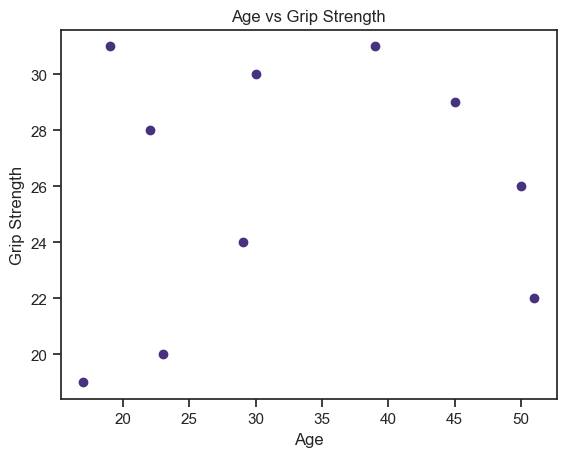

In [309]:
plt.scatter(data_set['Age'], data_set['GripStrength'])
plt.xlabel('Age')
plt.ylabel('Grip Strength')
plt.title('Age vs Grip Strength')
plt.savefig('../results/scatterplot_age_vs_gripstrength.png')
plt.show()

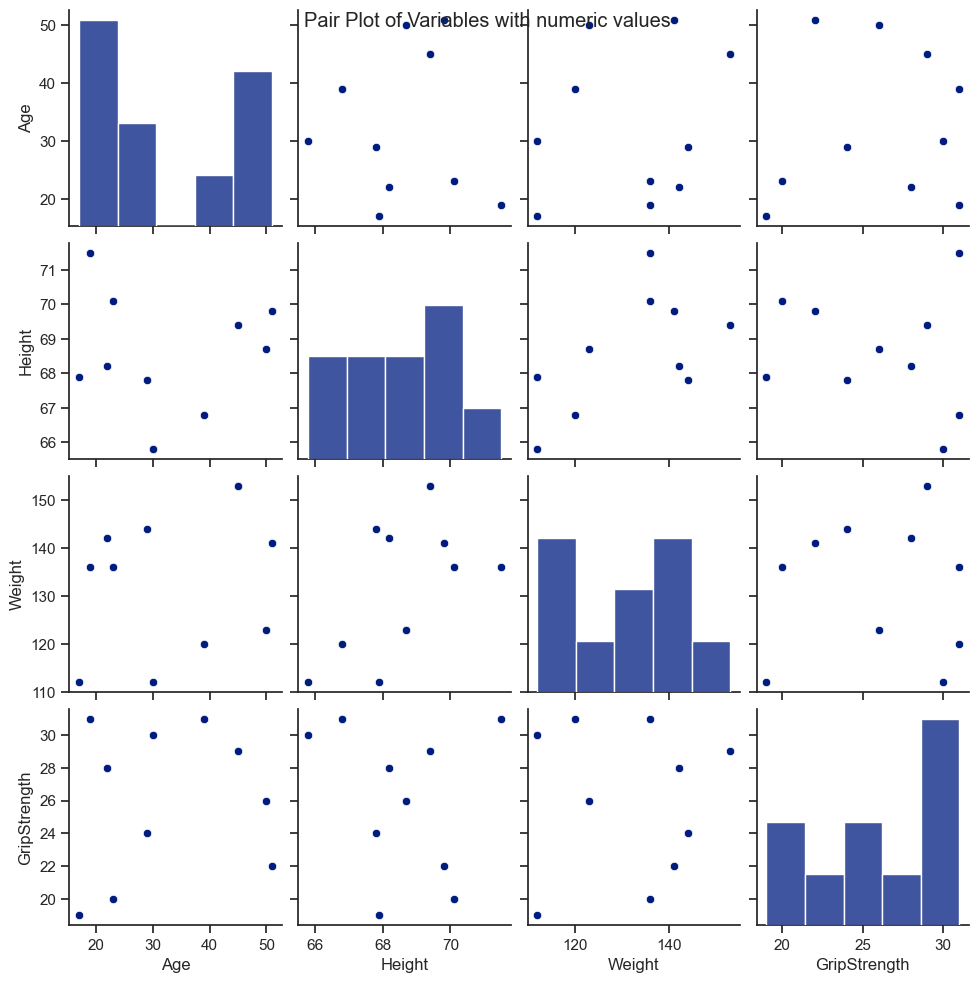

In [310]:
sns.set_theme(style="ticks", palette="dark")
sns.pairplot(data_set[['Age', 'Height', 'Weight', 'GripStrength']])
plt.suptitle('Pair Plot of Variables with numeric values')
plt.savefig('../results/scatterplot.png')
plt.show()

### Correlation Matrix

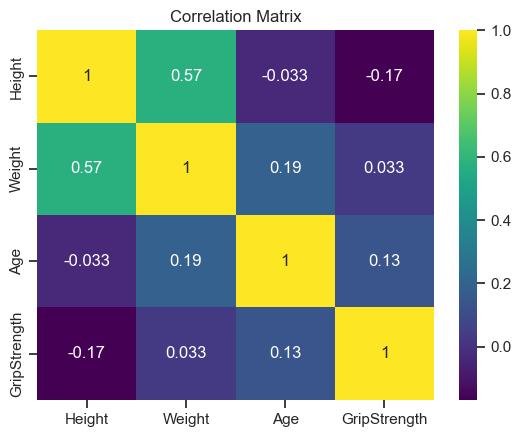

In [311]:
numeric_features = data_set.select_dtypes(include=['number'])
correlation_matrix = numeric_features.corr()
sns.set_palette("viridis")
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.savefig('../results/correlation_matrix.png')
plt.show()

### Histogram

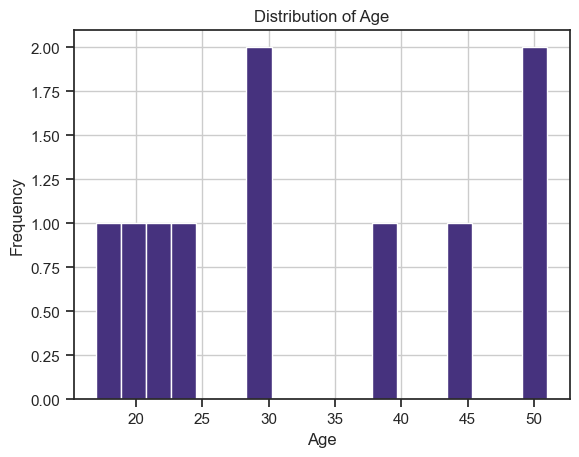

In [312]:
data_set['Age'].hist(bins=18)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.savefig('../results/Histogram.png')
plt.show()

### Violin Plot

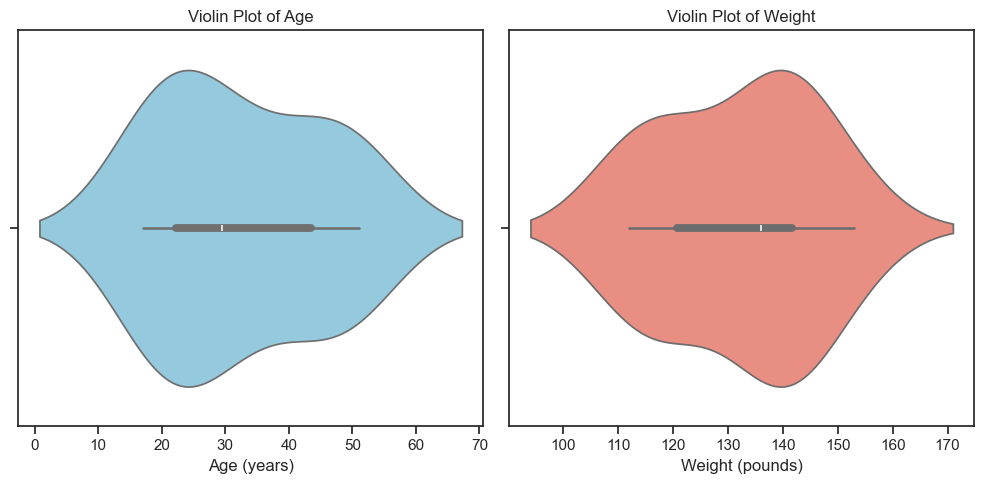

In [313]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.violinplot(x=data_set['Age'], color='skyblue')
plt.xlabel('Age (years)')
plt.title('Violin Plot of Age')
plt.subplot(1, 2, 2)
sns.violinplot(x=data_set['Weight'], color='salmon') 
plt.xlabel('Weight (pounds)')  
plt.title('Violin Plot of Weight')
plt.savefig('../results/violin_plot_of_age_and_weight.png')  
plt.tight_layout()
plt.show()

## Modeling and Analysis

### K-Means Clustering

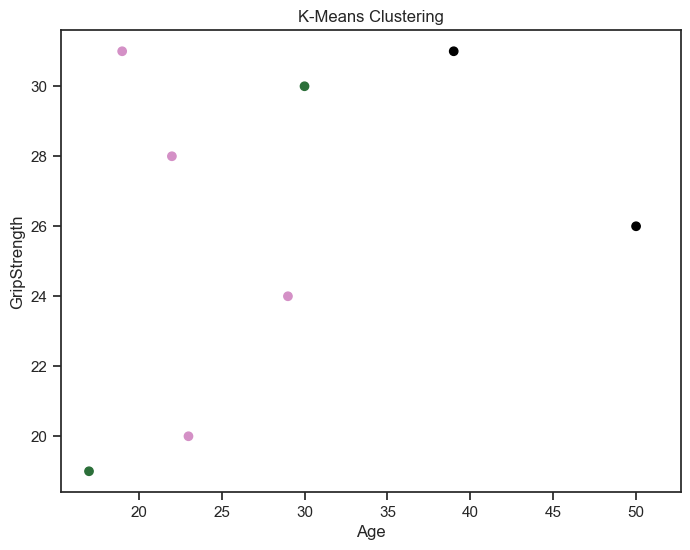

In [314]:
X = data_set[['Age', 'GripStrength', 'Height', 'Weight']]
num_of_clusters = 4
kmeans = KMeans(n_clusters=num_of_clusters, random_state=20)
kmeans.fit(X)
cluster_labels = kmeans.labels_
data_set['Cluster'] = cluster_labels
plt.figure(figsize=(8, 6))
plt.scatter(data_set['Age'], data_set['GripStrength'], c=cluster_labels, cmap='cubehelix')
plt.xlabel('Age')
plt.ylabel('GripStrength')
plt.title('K-Means Clustering')
plt.savefig('../results/K-means_Clustering.png')  
plt.show()

### Silhoutte Score

In [315]:
silhouette_scr = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_scr}")

Silhouette Score: 0.43012785397724196


The silhouette score measures clustering effectiveness, my score of 0.43 suggests reasonably well-separated and cohesive clusters